# This notebook trains Prophet time series forecasting models for different weather variables using historical hourly data for Ukrainian cities and saves the models for future predictions.

In [4]:
import os
import pickle

import pandas as pd
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [15]:
def load_city_data(city_name):
    file_path = f"data/{city_name}_weather.csv"
    df = pd.read_csv(file_path)

    column_mapping = {
        'date': 'ds',
        'temperature_2m': 'y_temp_2',
        'relative_humidity_2m': 'y_hum_2',
        'apparent_temperature': 'y_temp_a',
        'precipitation': 'y_precip',
        'rain': 'y_rain',
        'surface_pressure': 'y_press',
        'cloud_cover': 'y_cloud',
        'wind_speed_100m': 'y_w_speed',
        'wind_direction_100m': 'y_w_dir'
    }
    df = df.rename(columns=column_mapping)

    return df

In [16]:
def load_hyperparameters(model_name):
    hyperparameters_df = pd.read_csv("data/models_hyperparameters.csv")
    model_params = hyperparameters_df[hyperparameters_df['model'] == model_name].iloc[0]
    return model_params['changepoint_prior_scale'], model_params['seasonality_prior_scale']

In [17]:
models_directory = "models"
if not os.path.exists(models_directory):
    os.makedirs(models_directory)
    print(f"Directory {models_directory} created")
else:
    print(f"Directory {models_directory} already exists")

models = {}

Directory models already exists


In [18]:
cities_df = pd.read_csv("data/list_of_cities.csv")
cities = cities_df['city'].str.lower()
cities.head(3)

0       kyiv
1       lviv
2    kharkiv
Name: city, dtype: object

In [30]:
for city_name in cities:
    # Load data for the current city
    df = load_city_data(city_name)

    # Initialize the dictionary for the current city
    city_models = {}

    # Iterate through each variable
    variables = ['temp_2', 'hum_2', 'temp_a', 'precip', 'rain', 'press', 'cloud', 'w_speed', 'w_dir']
    for variable in variables:

        if variable in city_models:
            print(f"Model for {variable} in {city_name} already exists in the models dictionary. Skipping.")
            continue

        # Prepare data
        column_name = f'y_{variable}'
        df_temp = df[['ds', column_name]].rename(columns={column_name: 'y'})

        # Feature engineering: Adding lag variables
        for i in range(1, 6):
            df_temp[f'y_{variable}_lag_{i}'] = df_temp['y'].shift(i)

        # Drop rows with NaN values after adding lag variables
        df_temp = df_temp.dropna()

        # Load hyperparameters for the current model
        changepoint_prior_scale, seasonality_prior_scale = load_hyperparameters(variable)

        # Create and train the model with hyperparameters
        model = Prophet(changepoint_prior_scale=changepoint_prior_scale,
                        seasonality_prior_scale=seasonality_prior_scale)
        model.fit(df_temp)
        city_models[variable] = model

        print(f"Model for {variable} in {city_name} trained and added to the models dictionary.")
    models[city_name] = city_models


05:16:38 - cmdstanpy - INFO - Chain [1] start processing
05:16:40 - cmdstanpy - INFO - Chain [1] done processing


Model for temp_2 in kyiv trained and added to the models dictionary.


05:16:40 - cmdstanpy - INFO - Chain [1] start processing
05:16:41 - cmdstanpy - INFO - Chain [1] done processing


Model for hum_2 in kyiv trained and added to the models dictionary.


05:16:42 - cmdstanpy - INFO - Chain [1] start processing
05:16:48 - cmdstanpy - INFO - Chain [1] done processing


Model for temp_a in kyiv trained and added to the models dictionary.


05:16:49 - cmdstanpy - INFO - Chain [1] start processing
05:16:50 - cmdstanpy - INFO - Chain [1] done processing


Model for precip in kyiv trained and added to the models dictionary.


05:16:51 - cmdstanpy - INFO - Chain [1] start processing
05:16:52 - cmdstanpy - INFO - Chain [1] done processing


Model for rain in kyiv trained and added to the models dictionary.


05:16:53 - cmdstanpy - INFO - Chain [1] start processing
05:16:58 - cmdstanpy - INFO - Chain [1] done processing


Model for press in kyiv trained and added to the models dictionary.


05:16:59 - cmdstanpy - INFO - Chain [1] start processing
05:17:01 - cmdstanpy - INFO - Chain [1] done processing


Model for cloud in kyiv trained and added to the models dictionary.


05:17:02 - cmdstanpy - INFO - Chain [1] start processing
05:17:05 - cmdstanpy - INFO - Chain [1] done processing


Model for w_speed in kyiv trained and added to the models dictionary.


05:17:06 - cmdstanpy - INFO - Chain [1] start processing
05:17:10 - cmdstanpy - INFO - Chain [1] done processing


Model for w_dir in kyiv trained and added to the models dictionary.


05:17:11 - cmdstanpy - INFO - Chain [1] start processing
05:17:12 - cmdstanpy - INFO - Chain [1] done processing


Model for temp_2 in lviv trained and added to the models dictionary.


05:17:13 - cmdstanpy - INFO - Chain [1] start processing
05:17:14 - cmdstanpy - INFO - Chain [1] done processing


Model for hum_2 in lviv trained and added to the models dictionary.


05:17:15 - cmdstanpy - INFO - Chain [1] start processing
05:17:20 - cmdstanpy - INFO - Chain [1] done processing


Model for temp_a in lviv trained and added to the models dictionary.


05:17:21 - cmdstanpy - INFO - Chain [1] start processing
05:17:23 - cmdstanpy - INFO - Chain [1] done processing


Model for precip in lviv trained and added to the models dictionary.


05:17:23 - cmdstanpy - INFO - Chain [1] start processing
05:17:25 - cmdstanpy - INFO - Chain [1] done processing


Model for rain in lviv trained and added to the models dictionary.


05:17:25 - cmdstanpy - INFO - Chain [1] start processing
05:17:29 - cmdstanpy - INFO - Chain [1] done processing


Model for press in lviv trained and added to the models dictionary.


05:17:31 - cmdstanpy - INFO - Chain [1] start processing
05:17:33 - cmdstanpy - INFO - Chain [1] done processing


Model for cloud in lviv trained and added to the models dictionary.


05:17:34 - cmdstanpy - INFO - Chain [1] start processing
05:17:40 - cmdstanpy - INFO - Chain [1] done processing


Model for w_speed in lviv trained and added to the models dictionary.


05:17:41 - cmdstanpy - INFO - Chain [1] start processing
05:17:43 - cmdstanpy - INFO - Chain [1] done processing


Model for w_dir in lviv trained and added to the models dictionary.


05:17:43 - cmdstanpy - INFO - Chain [1] start processing
05:17:44 - cmdstanpy - INFO - Chain [1] done processing


Model for temp_2 in kharkiv trained and added to the models dictionary.


05:17:45 - cmdstanpy - INFO - Chain [1] start processing
05:17:46 - cmdstanpy - INFO - Chain [1] done processing


Model for hum_2 in kharkiv trained and added to the models dictionary.


05:17:46 - cmdstanpy - INFO - Chain [1] start processing
05:17:50 - cmdstanpy - INFO - Chain [1] done processing


Model for temp_a in kharkiv trained and added to the models dictionary.


05:17:51 - cmdstanpy - INFO - Chain [1] start processing
05:17:52 - cmdstanpy - INFO - Chain [1] done processing


Model for precip in kharkiv trained and added to the models dictionary.


05:17:53 - cmdstanpy - INFO - Chain [1] start processing
05:17:55 - cmdstanpy - INFO - Chain [1] done processing


Model for rain in kharkiv trained and added to the models dictionary.


05:17:56 - cmdstanpy - INFO - Chain [1] start processing
05:18:03 - cmdstanpy - INFO - Chain [1] done processing


Model for press in kharkiv trained and added to the models dictionary.


05:18:04 - cmdstanpy - INFO - Chain [1] start processing
05:18:06 - cmdstanpy - INFO - Chain [1] done processing


Model for cloud in kharkiv trained and added to the models dictionary.


05:18:07 - cmdstanpy - INFO - Chain [1] start processing
05:18:10 - cmdstanpy - INFO - Chain [1] done processing


Model for w_speed in kharkiv trained and added to the models dictionary.


05:18:10 - cmdstanpy - INFO - Chain [1] start processing
05:18:13 - cmdstanpy - INFO - Chain [1] done processing


Model for w_dir in kharkiv trained and added to the models dictionary.


05:18:14 - cmdstanpy - INFO - Chain [1] start processing
05:18:15 - cmdstanpy - INFO - Chain [1] done processing


Model for temp_2 in vinnytsia trained and added to the models dictionary.


05:18:16 - cmdstanpy - INFO - Chain [1] start processing
05:18:17 - cmdstanpy - INFO - Chain [1] done processing


Model for hum_2 in vinnytsia trained and added to the models dictionary.


05:18:17 - cmdstanpy - INFO - Chain [1] start processing
05:18:21 - cmdstanpy - INFO - Chain [1] done processing


Model for temp_a in vinnytsia trained and added to the models dictionary.


05:18:22 - cmdstanpy - INFO - Chain [1] start processing
05:18:24 - cmdstanpy - INFO - Chain [1] done processing


Model for precip in vinnytsia trained and added to the models dictionary.


05:18:24 - cmdstanpy - INFO - Chain [1] start processing
05:18:27 - cmdstanpy - INFO - Chain [1] done processing


Model for rain in vinnytsia trained and added to the models dictionary.


05:18:28 - cmdstanpy - INFO - Chain [1] start processing
05:18:33 - cmdstanpy - INFO - Chain [1] done processing


Model for press in vinnytsia trained and added to the models dictionary.


05:18:33 - cmdstanpy - INFO - Chain [1] start processing
05:18:36 - cmdstanpy - INFO - Chain [1] done processing


Model for cloud in vinnytsia trained and added to the models dictionary.


05:18:36 - cmdstanpy - INFO - Chain [1] start processing
05:18:40 - cmdstanpy - INFO - Chain [1] done processing


Model for w_speed in vinnytsia trained and added to the models dictionary.


05:18:41 - cmdstanpy - INFO - Chain [1] start processing
05:18:42 - cmdstanpy - INFO - Chain [1] done processing


Model for w_dir in vinnytsia trained and added to the models dictionary.


05:18:43 - cmdstanpy - INFO - Chain [1] start processing
05:18:44 - cmdstanpy - INFO - Chain [1] done processing


Model for temp_2 in chernihiv trained and added to the models dictionary.


05:18:45 - cmdstanpy - INFO - Chain [1] start processing
05:18:46 - cmdstanpy - INFO - Chain [1] done processing


Model for hum_2 in chernihiv trained and added to the models dictionary.


05:18:47 - cmdstanpy - INFO - Chain [1] start processing
05:18:52 - cmdstanpy - INFO - Chain [1] done processing


Model for temp_a in chernihiv trained and added to the models dictionary.


05:18:53 - cmdstanpy - INFO - Chain [1] start processing
05:18:56 - cmdstanpy - INFO - Chain [1] done processing


Model for precip in chernihiv trained and added to the models dictionary.


05:18:57 - cmdstanpy - INFO - Chain [1] start processing
05:19:00 - cmdstanpy - INFO - Chain [1] done processing


Model for rain in chernihiv trained and added to the models dictionary.


05:19:01 - cmdstanpy - INFO - Chain [1] start processing
05:19:08 - cmdstanpy - INFO - Chain [1] done processing


Model for press in chernihiv trained and added to the models dictionary.


05:19:09 - cmdstanpy - INFO - Chain [1] start processing
05:19:11 - cmdstanpy - INFO - Chain [1] done processing


Model for cloud in chernihiv trained and added to the models dictionary.


05:19:12 - cmdstanpy - INFO - Chain [1] start processing
05:19:14 - cmdstanpy - INFO - Chain [1] done processing


Model for w_speed in chernihiv trained and added to the models dictionary.


05:19:15 - cmdstanpy - INFO - Chain [1] start processing
05:19:18 - cmdstanpy - INFO - Chain [1] done processing


Model for w_dir in chernihiv trained and added to the models dictionary.


05:19:18 - cmdstanpy - INFO - Chain [1] start processing
05:19:19 - cmdstanpy - INFO - Chain [1] done processing


Model for temp_2 in donetsk trained and added to the models dictionary.


05:19:20 - cmdstanpy - INFO - Chain [1] start processing
05:19:22 - cmdstanpy - INFO - Chain [1] done processing


Model for hum_2 in donetsk trained and added to the models dictionary.


05:19:23 - cmdstanpy - INFO - Chain [1] start processing
05:19:27 - cmdstanpy - INFO - Chain [1] done processing


Model for temp_a in donetsk trained and added to the models dictionary.


05:19:28 - cmdstanpy - INFO - Chain [1] start processing
05:19:29 - cmdstanpy - INFO - Chain [1] done processing


Model for precip in donetsk trained and added to the models dictionary.


05:19:30 - cmdstanpy - INFO - Chain [1] start processing
05:19:31 - cmdstanpy - INFO - Chain [1] done processing


Model for rain in donetsk trained and added to the models dictionary.


05:19:31 - cmdstanpy - INFO - Chain [1] start processing
05:19:38 - cmdstanpy - INFO - Chain [1] done processing


Model for press in donetsk trained and added to the models dictionary.


05:19:39 - cmdstanpy - INFO - Chain [1] start processing
05:19:42 - cmdstanpy - INFO - Chain [1] done processing


Model for cloud in donetsk trained and added to the models dictionary.


05:19:43 - cmdstanpy - INFO - Chain [1] start processing
05:19:45 - cmdstanpy - INFO - Chain [1] done processing


Model for w_speed in donetsk trained and added to the models dictionary.


05:19:46 - cmdstanpy - INFO - Chain [1] start processing
05:19:48 - cmdstanpy - INFO - Chain [1] done processing


Model for w_dir in donetsk trained and added to the models dictionary.


05:19:48 - cmdstanpy - INFO - Chain [1] start processing
05:19:49 - cmdstanpy - INFO - Chain [1] done processing


Model for temp_2 in luhansk trained and added to the models dictionary.


05:19:50 - cmdstanpy - INFO - Chain [1] start processing
05:19:51 - cmdstanpy - INFO - Chain [1] done processing


Model for hum_2 in luhansk trained and added to the models dictionary.


05:19:51 - cmdstanpy - INFO - Chain [1] start processing
05:19:59 - cmdstanpy - INFO - Chain [1] done processing


Model for temp_a in luhansk trained and added to the models dictionary.


05:19:59 - cmdstanpy - INFO - Chain [1] start processing
05:20:01 - cmdstanpy - INFO - Chain [1] done processing


Model for precip in luhansk trained and added to the models dictionary.


05:20:02 - cmdstanpy - INFO - Chain [1] start processing
05:20:03 - cmdstanpy - INFO - Chain [1] done processing


Model for rain in luhansk trained and added to the models dictionary.


05:20:04 - cmdstanpy - INFO - Chain [1] start processing
05:20:09 - cmdstanpy - INFO - Chain [1] done processing


Model for press in luhansk trained and added to the models dictionary.


05:20:10 - cmdstanpy - INFO - Chain [1] start processing
05:20:11 - cmdstanpy - INFO - Chain [1] done processing


Model for cloud in luhansk trained and added to the models dictionary.


05:20:12 - cmdstanpy - INFO - Chain [1] start processing
05:20:14 - cmdstanpy - INFO - Chain [1] done processing


Model for w_speed in luhansk trained and added to the models dictionary.


05:20:15 - cmdstanpy - INFO - Chain [1] start processing
05:20:17 - cmdstanpy - INFO - Chain [1] done processing


Model for w_dir in luhansk trained and added to the models dictionary.


05:20:17 - cmdstanpy - INFO - Chain [1] start processing
05:20:18 - cmdstanpy - INFO - Chain [1] done processing


Model for temp_2 in sumy trained and added to the models dictionary.


05:20:19 - cmdstanpy - INFO - Chain [1] start processing
05:20:19 - cmdstanpy - INFO - Chain [1] done processing


Model for hum_2 in sumy trained and added to the models dictionary.


05:20:20 - cmdstanpy - INFO - Chain [1] start processing
05:20:28 - cmdstanpy - INFO - Chain [1] done processing


Model for temp_a in sumy trained and added to the models dictionary.


05:20:28 - cmdstanpy - INFO - Chain [1] start processing
05:20:31 - cmdstanpy - INFO - Chain [1] done processing


Model for precip in sumy trained and added to the models dictionary.


05:20:31 - cmdstanpy - INFO - Chain [1] start processing
05:20:35 - cmdstanpy - INFO - Chain [1] done processing


Model for rain in sumy trained and added to the models dictionary.


05:20:36 - cmdstanpy - INFO - Chain [1] start processing
05:20:42 - cmdstanpy - INFO - Chain [1] done processing


Model for press in sumy trained and added to the models dictionary.


05:20:43 - cmdstanpy - INFO - Chain [1] start processing
05:20:45 - cmdstanpy - INFO - Chain [1] done processing


Model for cloud in sumy trained and added to the models dictionary.


05:20:46 - cmdstanpy - INFO - Chain [1] start processing
05:20:51 - cmdstanpy - INFO - Chain [1] done processing


Model for w_speed in sumy trained and added to the models dictionary.


05:20:52 - cmdstanpy - INFO - Chain [1] start processing
05:20:54 - cmdstanpy - INFO - Chain [1] done processing


Model for w_dir in sumy trained and added to the models dictionary.


05:20:54 - cmdstanpy - INFO - Chain [1] start processing
05:20:55 - cmdstanpy - INFO - Chain [1] done processing


Model for temp_2 in dnipro trained and added to the models dictionary.


05:20:56 - cmdstanpy - INFO - Chain [1] start processing
05:20:57 - cmdstanpy - INFO - Chain [1] done processing


Model for hum_2 in dnipro trained and added to the models dictionary.


05:20:57 - cmdstanpy - INFO - Chain [1] start processing
05:21:02 - cmdstanpy - INFO - Chain [1] done processing


Model for temp_a in dnipro trained and added to the models dictionary.


05:21:03 - cmdstanpy - INFO - Chain [1] start processing
05:21:04 - cmdstanpy - INFO - Chain [1] done processing


Model for precip in dnipro trained and added to the models dictionary.


05:21:05 - cmdstanpy - INFO - Chain [1] start processing
05:21:06 - cmdstanpy - INFO - Chain [1] done processing


Model for rain in dnipro trained and added to the models dictionary.


05:21:06 - cmdstanpy - INFO - Chain [1] start processing
05:21:12 - cmdstanpy - INFO - Chain [1] done processing


Model for press in dnipro trained and added to the models dictionary.


05:21:12 - cmdstanpy - INFO - Chain [1] start processing
05:21:16 - cmdstanpy - INFO - Chain [1] done processing


Model for cloud in dnipro trained and added to the models dictionary.


05:21:16 - cmdstanpy - INFO - Chain [1] start processing
05:21:20 - cmdstanpy - INFO - Chain [1] done processing


Model for w_speed in dnipro trained and added to the models dictionary.


05:21:21 - cmdstanpy - INFO - Chain [1] start processing
05:21:23 - cmdstanpy - INFO - Chain [1] done processing


Model for w_dir in dnipro trained and added to the models dictionary.


05:21:23 - cmdstanpy - INFO - Chain [1] start processing
05:21:24 - cmdstanpy - INFO - Chain [1] done processing


Model for temp_2 in poltava trained and added to the models dictionary.


05:21:25 - cmdstanpy - INFO - Chain [1] start processing
05:21:26 - cmdstanpy - INFO - Chain [1] done processing


Model for hum_2 in poltava trained and added to the models dictionary.


05:21:26 - cmdstanpy - INFO - Chain [1] start processing
05:21:31 - cmdstanpy - INFO - Chain [1] done processing


Model for temp_a in poltava trained and added to the models dictionary.


05:21:32 - cmdstanpy - INFO - Chain [1] start processing
05:21:34 - cmdstanpy - INFO - Chain [1] done processing


Model for precip in poltava trained and added to the models dictionary.


05:21:34 - cmdstanpy - INFO - Chain [1] start processing
05:21:35 - cmdstanpy - INFO - Chain [1] done processing


Model for rain in poltava trained and added to the models dictionary.


05:21:36 - cmdstanpy - INFO - Chain [1] start processing
05:21:43 - cmdstanpy - INFO - Chain [1] done processing


Model for press in poltava trained and added to the models dictionary.


05:21:43 - cmdstanpy - INFO - Chain [1] start processing
05:21:46 - cmdstanpy - INFO - Chain [1] done processing


Model for cloud in poltava trained and added to the models dictionary.


05:21:47 - cmdstanpy - INFO - Chain [1] start processing
05:21:50 - cmdstanpy - INFO - Chain [1] done processing


Model for w_speed in poltava trained and added to the models dictionary.


05:21:51 - cmdstanpy - INFO - Chain [1] start processing
05:21:54 - cmdstanpy - INFO - Chain [1] done processing


Model for w_dir in poltava trained and added to the models dictionary.


05:21:55 - cmdstanpy - INFO - Chain [1] start processing
05:21:55 - cmdstanpy - INFO - Chain [1] done processing


Model for temp_2 in zaporizhzhia trained and added to the models dictionary.


05:21:56 - cmdstanpy - INFO - Chain [1] start processing
05:21:57 - cmdstanpy - INFO - Chain [1] done processing


Model for hum_2 in zaporizhzhia trained and added to the models dictionary.


05:21:58 - cmdstanpy - INFO - Chain [1] start processing
05:22:02 - cmdstanpy - INFO - Chain [1] done processing


Model for temp_a in zaporizhzhia trained and added to the models dictionary.


05:22:03 - cmdstanpy - INFO - Chain [1] start processing
05:22:04 - cmdstanpy - INFO - Chain [1] done processing


Model for precip in zaporizhzhia trained and added to the models dictionary.


05:22:05 - cmdstanpy - INFO - Chain [1] start processing
05:22:06 - cmdstanpy - INFO - Chain [1] done processing


Model for rain in zaporizhzhia trained and added to the models dictionary.


05:22:07 - cmdstanpy - INFO - Chain [1] start processing
05:22:14 - cmdstanpy - INFO - Chain [1] done processing


Model for press in zaporizhzhia trained and added to the models dictionary.


05:22:14 - cmdstanpy - INFO - Chain [1] start processing
05:22:17 - cmdstanpy - INFO - Chain [1] done processing


Model for cloud in zaporizhzhia trained and added to the models dictionary.


05:22:18 - cmdstanpy - INFO - Chain [1] start processing
05:22:20 - cmdstanpy - INFO - Chain [1] done processing


Model for w_speed in zaporizhzhia trained and added to the models dictionary.


05:22:21 - cmdstanpy - INFO - Chain [1] start processing
05:22:23 - cmdstanpy - INFO - Chain [1] done processing


Model for w_dir in zaporizhzhia trained and added to the models dictionary.


05:22:24 - cmdstanpy - INFO - Chain [1] start processing
05:22:25 - cmdstanpy - INFO - Chain [1] done processing


Model for temp_2 in kherson trained and added to the models dictionary.


05:22:26 - cmdstanpy - INFO - Chain [1] start processing
05:22:27 - cmdstanpy - INFO - Chain [1] done processing


Model for hum_2 in kherson trained and added to the models dictionary.


05:22:28 - cmdstanpy - INFO - Chain [1] start processing
05:22:32 - cmdstanpy - INFO - Chain [1] done processing


Model for temp_a in kherson trained and added to the models dictionary.


05:22:33 - cmdstanpy - INFO - Chain [1] start processing
05:22:34 - cmdstanpy - INFO - Chain [1] done processing


Model for precip in kherson trained and added to the models dictionary.


05:22:35 - cmdstanpy - INFO - Chain [1] start processing
05:22:37 - cmdstanpy - INFO - Chain [1] done processing


Model for rain in kherson trained and added to the models dictionary.


05:22:38 - cmdstanpy - INFO - Chain [1] start processing
05:22:41 - cmdstanpy - INFO - Chain [1] done processing


Model for press in kherson trained and added to the models dictionary.


05:22:42 - cmdstanpy - INFO - Chain [1] start processing
05:22:44 - cmdstanpy - INFO - Chain [1] done processing


Model for cloud in kherson trained and added to the models dictionary.


05:22:44 - cmdstanpy - INFO - Chain [1] start processing
05:22:46 - cmdstanpy - INFO - Chain [1] done processing


Model for w_speed in kherson trained and added to the models dictionary.


05:22:47 - cmdstanpy - INFO - Chain [1] start processing
05:22:49 - cmdstanpy - INFO - Chain [1] done processing


Model for w_dir in kherson trained and added to the models dictionary.


05:22:50 - cmdstanpy - INFO - Chain [1] start processing
05:22:51 - cmdstanpy - INFO - Chain [1] done processing


Model for temp_2 in mykolaiv trained and added to the models dictionary.


05:22:52 - cmdstanpy - INFO - Chain [1] start processing
05:22:53 - cmdstanpy - INFO - Chain [1] done processing


Model for hum_2 in mykolaiv trained and added to the models dictionary.


05:22:54 - cmdstanpy - INFO - Chain [1] start processing
05:22:58 - cmdstanpy - INFO - Chain [1] done processing


Model for temp_a in mykolaiv trained and added to the models dictionary.


05:22:59 - cmdstanpy - INFO - Chain [1] start processing
05:23:00 - cmdstanpy - INFO - Chain [1] done processing


Model for precip in mykolaiv trained and added to the models dictionary.


05:23:01 - cmdstanpy - INFO - Chain [1] start processing
05:23:02 - cmdstanpy - INFO - Chain [1] done processing


Model for rain in mykolaiv trained and added to the models dictionary.


05:23:03 - cmdstanpy - INFO - Chain [1] start processing
05:23:09 - cmdstanpy - INFO - Chain [1] done processing


Model for press in mykolaiv trained and added to the models dictionary.


05:23:10 - cmdstanpy - INFO - Chain [1] start processing
05:23:12 - cmdstanpy - INFO - Chain [1] done processing


Model for cloud in mykolaiv trained and added to the models dictionary.


05:23:13 - cmdstanpy - INFO - Chain [1] start processing
05:23:15 - cmdstanpy - INFO - Chain [1] done processing


Model for w_speed in mykolaiv trained and added to the models dictionary.


05:23:16 - cmdstanpy - INFO - Chain [1] start processing
05:23:18 - cmdstanpy - INFO - Chain [1] done processing


Model for w_dir in mykolaiv trained and added to the models dictionary.


05:23:19 - cmdstanpy - INFO - Chain [1] start processing
05:23:20 - cmdstanpy - INFO - Chain [1] done processing


Model for temp_2 in odesa trained and added to the models dictionary.


05:23:21 - cmdstanpy - INFO - Chain [1] start processing
05:23:22 - cmdstanpy - INFO - Chain [1] done processing


Model for hum_2 in odesa trained and added to the models dictionary.


05:23:23 - cmdstanpy - INFO - Chain [1] start processing
05:23:29 - cmdstanpy - INFO - Chain [1] done processing


Model for temp_a in odesa trained and added to the models dictionary.


05:23:29 - cmdstanpy - INFO - Chain [1] start processing
05:23:31 - cmdstanpy - INFO - Chain [1] done processing


Model for precip in odesa trained and added to the models dictionary.


05:23:32 - cmdstanpy - INFO - Chain [1] start processing
05:23:34 - cmdstanpy - INFO - Chain [1] done processing


Model for rain in odesa trained and added to the models dictionary.


05:23:35 - cmdstanpy - INFO - Chain [1] start processing
05:23:42 - cmdstanpy - INFO - Chain [1] done processing


Model for press in odesa trained and added to the models dictionary.


05:23:43 - cmdstanpy - INFO - Chain [1] start processing
05:23:44 - cmdstanpy - INFO - Chain [1] done processing


Model for cloud in odesa trained and added to the models dictionary.


05:23:45 - cmdstanpy - INFO - Chain [1] start processing
05:23:48 - cmdstanpy - INFO - Chain [1] done processing


Model for w_speed in odesa trained and added to the models dictionary.


05:23:49 - cmdstanpy - INFO - Chain [1] start processing
05:23:52 - cmdstanpy - INFO - Chain [1] done processing


Model for w_dir in odesa trained and added to the models dictionary.


05:23:53 - cmdstanpy - INFO - Chain [1] start processing
05:23:54 - cmdstanpy - INFO - Chain [1] done processing


Model for temp_2 in cherkasy trained and added to the models dictionary.


05:23:55 - cmdstanpy - INFO - Chain [1] start processing
05:23:56 - cmdstanpy - INFO - Chain [1] done processing


Model for hum_2 in cherkasy trained and added to the models dictionary.


05:23:56 - cmdstanpy - INFO - Chain [1] start processing
05:24:04 - cmdstanpy - INFO - Chain [1] done processing


Model for temp_a in cherkasy trained and added to the models dictionary.


05:24:04 - cmdstanpy - INFO - Chain [1] start processing
05:24:07 - cmdstanpy - INFO - Chain [1] done processing


Model for precip in cherkasy trained and added to the models dictionary.


05:24:08 - cmdstanpy - INFO - Chain [1] start processing
05:24:09 - cmdstanpy - INFO - Chain [1] done processing


Model for rain in cherkasy trained and added to the models dictionary.


05:24:10 - cmdstanpy - INFO - Chain [1] start processing
05:24:14 - cmdstanpy - INFO - Chain [1] done processing


Model for press in cherkasy trained and added to the models dictionary.


05:24:15 - cmdstanpy - INFO - Chain [1] start processing
05:24:17 - cmdstanpy - INFO - Chain [1] done processing


Model for cloud in cherkasy trained and added to the models dictionary.


05:24:18 - cmdstanpy - INFO - Chain [1] start processing
05:24:22 - cmdstanpy - INFO - Chain [1] done processing


Model for w_speed in cherkasy trained and added to the models dictionary.


05:24:23 - cmdstanpy - INFO - Chain [1] start processing
05:24:25 - cmdstanpy - INFO - Chain [1] done processing


Model for w_dir in cherkasy trained and added to the models dictionary.


05:24:25 - cmdstanpy - INFO - Chain [1] start processing
05:24:27 - cmdstanpy - INFO - Chain [1] done processing


Model for temp_2 in sevastopol trained and added to the models dictionary.


05:24:27 - cmdstanpy - INFO - Chain [1] start processing
05:24:29 - cmdstanpy - INFO - Chain [1] done processing


Model for hum_2 in sevastopol trained and added to the models dictionary.


05:24:29 - cmdstanpy - INFO - Chain [1] start processing
05:24:37 - cmdstanpy - INFO - Chain [1] done processing


Model for temp_a in sevastopol trained and added to the models dictionary.


05:24:38 - cmdstanpy - INFO - Chain [1] start processing
05:24:39 - cmdstanpy - INFO - Chain [1] done processing


Model for precip in sevastopol trained and added to the models dictionary.


05:24:40 - cmdstanpy - INFO - Chain [1] start processing
05:24:42 - cmdstanpy - INFO - Chain [1] done processing


Model for rain in sevastopol trained and added to the models dictionary.


05:24:43 - cmdstanpy - INFO - Chain [1] start processing
05:24:48 - cmdstanpy - INFO - Chain [1] done processing


Model for press in sevastopol trained and added to the models dictionary.


05:24:48 - cmdstanpy - INFO - Chain [1] start processing
05:24:49 - cmdstanpy - INFO - Chain [1] done processing


Model for cloud in sevastopol trained and added to the models dictionary.


05:24:50 - cmdstanpy - INFO - Chain [1] start processing
05:24:53 - cmdstanpy - INFO - Chain [1] done processing


Model for w_speed in sevastopol trained and added to the models dictionary.


05:24:54 - cmdstanpy - INFO - Chain [1] start processing
05:24:55 - cmdstanpy - INFO - Chain [1] done processing


Model for w_dir in sevastopol trained and added to the models dictionary.


05:24:56 - cmdstanpy - INFO - Chain [1] start processing
05:24:59 - cmdstanpy - INFO - Chain [1] done processing


Model for temp_2 in ternopil trained and added to the models dictionary.


05:24:59 - cmdstanpy - INFO - Chain [1] start processing
05:25:00 - cmdstanpy - INFO - Chain [1] done processing


Model for hum_2 in ternopil trained and added to the models dictionary.


05:25:01 - cmdstanpy - INFO - Chain [1] start processing
05:25:05 - cmdstanpy - INFO - Chain [1] done processing


Model for temp_a in ternopil trained and added to the models dictionary.


05:25:06 - cmdstanpy - INFO - Chain [1] start processing
05:25:07 - cmdstanpy - INFO - Chain [1] done processing


Model for precip in ternopil trained and added to the models dictionary.


05:25:07 - cmdstanpy - INFO - Chain [1] start processing
05:25:08 - cmdstanpy - INFO - Chain [1] done processing


Model for rain in ternopil trained and added to the models dictionary.


05:25:09 - cmdstanpy - INFO - Chain [1] start processing
05:25:14 - cmdstanpy - INFO - Chain [1] done processing


Model for press in ternopil trained and added to the models dictionary.


05:25:15 - cmdstanpy - INFO - Chain [1] start processing
05:25:16 - cmdstanpy - INFO - Chain [1] done processing


Model for cloud in ternopil trained and added to the models dictionary.


05:25:17 - cmdstanpy - INFO - Chain [1] start processing
05:25:22 - cmdstanpy - INFO - Chain [1] done processing


Model for w_speed in ternopil trained and added to the models dictionary.


05:25:23 - cmdstanpy - INFO - Chain [1] start processing
05:25:25 - cmdstanpy - INFO - Chain [1] done processing


Model for w_dir in ternopil trained and added to the models dictionary.


05:25:26 - cmdstanpy - INFO - Chain [1] start processing
05:25:28 - cmdstanpy - INFO - Chain [1] done processing


Model for temp_2 in zhytomyr trained and added to the models dictionary.


05:25:28 - cmdstanpy - INFO - Chain [1] start processing
05:25:30 - cmdstanpy - INFO - Chain [1] done processing


Model for hum_2 in zhytomyr trained and added to the models dictionary.


05:25:30 - cmdstanpy - INFO - Chain [1] start processing
05:25:35 - cmdstanpy - INFO - Chain [1] done processing


Model for temp_a in zhytomyr trained and added to the models dictionary.


05:25:36 - cmdstanpy - INFO - Chain [1] start processing
05:25:39 - cmdstanpy - INFO - Chain [1] done processing


Model for precip in zhytomyr trained and added to the models dictionary.


05:25:40 - cmdstanpy - INFO - Chain [1] start processing
05:25:43 - cmdstanpy - INFO - Chain [1] done processing


Model for rain in zhytomyr trained and added to the models dictionary.


05:25:44 - cmdstanpy - INFO - Chain [1] start processing
05:25:53 - cmdstanpy - INFO - Chain [1] done processing


Model for press in zhytomyr trained and added to the models dictionary.


05:25:53 - cmdstanpy - INFO - Chain [1] start processing
05:25:55 - cmdstanpy - INFO - Chain [1] done processing


Model for cloud in zhytomyr trained and added to the models dictionary.


05:25:56 - cmdstanpy - INFO - Chain [1] start processing
05:26:00 - cmdstanpy - INFO - Chain [1] done processing


Model for w_speed in zhytomyr trained and added to the models dictionary.


05:26:01 - cmdstanpy - INFO - Chain [1] start processing
05:26:03 - cmdstanpy - INFO - Chain [1] done processing


Model for w_dir in zhytomyr trained and added to the models dictionary.


05:26:04 - cmdstanpy - INFO - Chain [1] start processing
05:26:06 - cmdstanpy - INFO - Chain [1] done processing


Model for temp_2 in rivne trained and added to the models dictionary.


05:26:07 - cmdstanpy - INFO - Chain [1] start processing
05:26:08 - cmdstanpy - INFO - Chain [1] done processing


Model for hum_2 in rivne trained and added to the models dictionary.


05:26:09 - cmdstanpy - INFO - Chain [1] start processing
05:26:14 - cmdstanpy - INFO - Chain [1] done processing


Model for temp_a in rivne trained and added to the models dictionary.


05:26:15 - cmdstanpy - INFO - Chain [1] start processing
05:26:18 - cmdstanpy - INFO - Chain [1] done processing


Model for precip in rivne trained and added to the models dictionary.


05:26:19 - cmdstanpy - INFO - Chain [1] start processing
05:26:24 - cmdstanpy - INFO - Chain [1] done processing


Model for rain in rivne trained and added to the models dictionary.


05:26:25 - cmdstanpy - INFO - Chain [1] start processing
05:26:31 - cmdstanpy - INFO - Chain [1] done processing


Model for press in rivne trained and added to the models dictionary.


05:26:32 - cmdstanpy - INFO - Chain [1] start processing
05:26:33 - cmdstanpy - INFO - Chain [1] done processing


Model for cloud in rivne trained and added to the models dictionary.


05:26:34 - cmdstanpy - INFO - Chain [1] start processing
05:26:39 - cmdstanpy - INFO - Chain [1] done processing


Model for w_speed in rivne trained and added to the models dictionary.


05:26:40 - cmdstanpy - INFO - Chain [1] start processing
05:26:43 - cmdstanpy - INFO - Chain [1] done processing


Model for w_dir in rivne trained and added to the models dictionary.


05:26:43 - cmdstanpy - INFO - Chain [1] start processing
05:26:46 - cmdstanpy - INFO - Chain [1] done processing


Model for temp_2 in lutsk trained and added to the models dictionary.


05:26:46 - cmdstanpy - INFO - Chain [1] start processing
05:26:48 - cmdstanpy - INFO - Chain [1] done processing


Model for hum_2 in lutsk trained and added to the models dictionary.


05:26:49 - cmdstanpy - INFO - Chain [1] start processing
05:26:53 - cmdstanpy - INFO - Chain [1] done processing


Model for temp_a in lutsk trained and added to the models dictionary.


05:26:54 - cmdstanpy - INFO - Chain [1] start processing
05:26:57 - cmdstanpy - INFO - Chain [1] done processing


Model for precip in lutsk trained and added to the models dictionary.


05:26:58 - cmdstanpy - INFO - Chain [1] start processing
05:27:01 - cmdstanpy - INFO - Chain [1] done processing


Model for rain in lutsk trained and added to the models dictionary.


05:27:01 - cmdstanpy - INFO - Chain [1] start processing
05:27:06 - cmdstanpy - INFO - Chain [1] done processing


Model for press in lutsk trained and added to the models dictionary.


05:27:07 - cmdstanpy - INFO - Chain [1] start processing
05:27:09 - cmdstanpy - INFO - Chain [1] done processing


Model for cloud in lutsk trained and added to the models dictionary.


05:27:10 - cmdstanpy - INFO - Chain [1] start processing
05:27:14 - cmdstanpy - INFO - Chain [1] done processing


Model for w_speed in lutsk trained and added to the models dictionary.


05:27:15 - cmdstanpy - INFO - Chain [1] start processing
05:27:18 - cmdstanpy - INFO - Chain [1] done processing


Model for w_dir in lutsk trained and added to the models dictionary.


05:27:18 - cmdstanpy - INFO - Chain [1] start processing
05:27:20 - cmdstanpy - INFO - Chain [1] done processing


Model for temp_2 in khmelnytskyi trained and added to the models dictionary.


05:27:21 - cmdstanpy - INFO - Chain [1] start processing
05:27:22 - cmdstanpy - INFO - Chain [1] done processing


Model for hum_2 in khmelnytskyi trained and added to the models dictionary.


05:27:22 - cmdstanpy - INFO - Chain [1] start processing
05:27:27 - cmdstanpy - INFO - Chain [1] done processing


Model for temp_a in khmelnytskyi trained and added to the models dictionary.


05:27:28 - cmdstanpy - INFO - Chain [1] start processing
05:27:29 - cmdstanpy - INFO - Chain [1] done processing


Model for precip in khmelnytskyi trained and added to the models dictionary.


05:27:30 - cmdstanpy - INFO - Chain [1] start processing
05:27:33 - cmdstanpy - INFO - Chain [1] done processing


Model for rain in khmelnytskyi trained and added to the models dictionary.


05:27:34 - cmdstanpy - INFO - Chain [1] start processing
05:27:39 - cmdstanpy - INFO - Chain [1] done processing


Model for press in khmelnytskyi trained and added to the models dictionary.


05:27:39 - cmdstanpy - INFO - Chain [1] start processing
05:27:42 - cmdstanpy - INFO - Chain [1] done processing


Model for cloud in khmelnytskyi trained and added to the models dictionary.


05:27:42 - cmdstanpy - INFO - Chain [1] start processing
05:27:47 - cmdstanpy - INFO - Chain [1] done processing


Model for w_speed in khmelnytskyi trained and added to the models dictionary.


05:27:48 - cmdstanpy - INFO - Chain [1] start processing
05:27:51 - cmdstanpy - INFO - Chain [1] done processing


Model for w_dir in khmelnytskyi trained and added to the models dictionary.


05:27:52 - cmdstanpy - INFO - Chain [1] start processing
05:27:52 - cmdstanpy - INFO - Chain [1] done processing


Model for temp_2 in chernivtsi trained and added to the models dictionary.


05:27:53 - cmdstanpy - INFO - Chain [1] start processing
05:27:54 - cmdstanpy - INFO - Chain [1] done processing


Model for hum_2 in chernivtsi trained and added to the models dictionary.


05:27:55 - cmdstanpy - INFO - Chain [1] start processing
05:28:02 - cmdstanpy - INFO - Chain [1] done processing


Model for temp_a in chernivtsi trained and added to the models dictionary.


05:28:04 - cmdstanpy - INFO - Chain [1] start processing
05:28:05 - cmdstanpy - INFO - Chain [1] done processing


Model for precip in chernivtsi trained and added to the models dictionary.


05:28:06 - cmdstanpy - INFO - Chain [1] start processing
05:28:07 - cmdstanpy - INFO - Chain [1] done processing


Model for rain in chernivtsi trained and added to the models dictionary.


05:28:07 - cmdstanpy - INFO - Chain [1] start processing
05:28:13 - cmdstanpy - INFO - Chain [1] done processing


Model for press in chernivtsi trained and added to the models dictionary.


05:28:14 - cmdstanpy - INFO - Chain [1] start processing
05:28:16 - cmdstanpy - INFO - Chain [1] done processing


Model for cloud in chernivtsi trained and added to the models dictionary.


05:28:17 - cmdstanpy - INFO - Chain [1] start processing
05:28:20 - cmdstanpy - INFO - Chain [1] done processing


Model for w_speed in chernivtsi trained and added to the models dictionary.


05:28:21 - cmdstanpy - INFO - Chain [1] start processing
05:28:22 - cmdstanpy - INFO - Chain [1] done processing


Model for w_dir in chernivtsi trained and added to the models dictionary.


05:28:23 - cmdstanpy - INFO - Chain [1] start processing
05:28:24 - cmdstanpy - INFO - Chain [1] done processing


Model for temp_2 in ivano-frankivsk trained and added to the models dictionary.


05:28:24 - cmdstanpy - INFO - Chain [1] start processing
05:28:26 - cmdstanpy - INFO - Chain [1] done processing


Model for hum_2 in ivano-frankivsk trained and added to the models dictionary.


05:28:27 - cmdstanpy - INFO - Chain [1] start processing
05:28:31 - cmdstanpy - INFO - Chain [1] done processing


Model for temp_a in ivano-frankivsk trained and added to the models dictionary.


05:28:32 - cmdstanpy - INFO - Chain [1] start processing
05:28:34 - cmdstanpy - INFO - Chain [1] done processing


Model for precip in ivano-frankivsk trained and added to the models dictionary.


05:28:35 - cmdstanpy - INFO - Chain [1] start processing
05:28:36 - cmdstanpy - INFO - Chain [1] done processing


Model for rain in ivano-frankivsk trained and added to the models dictionary.


05:28:37 - cmdstanpy - INFO - Chain [1] start processing
05:28:42 - cmdstanpy - INFO - Chain [1] done processing


Model for press in ivano-frankivsk trained and added to the models dictionary.


05:28:43 - cmdstanpy - INFO - Chain [1] start processing
05:28:46 - cmdstanpy - INFO - Chain [1] done processing


Model for cloud in ivano-frankivsk trained and added to the models dictionary.


05:28:46 - cmdstanpy - INFO - Chain [1] start processing
05:28:50 - cmdstanpy - INFO - Chain [1] done processing


Model for w_speed in ivano-frankivsk trained and added to the models dictionary.


05:28:51 - cmdstanpy - INFO - Chain [1] start processing
05:28:53 - cmdstanpy - INFO - Chain [1] done processing


Model for w_dir in ivano-frankivsk trained and added to the models dictionary.


05:28:53 - cmdstanpy - INFO - Chain [1] start processing
05:28:55 - cmdstanpy - INFO - Chain [1] done processing


Model for temp_2 in uzhhorod trained and added to the models dictionary.


05:28:56 - cmdstanpy - INFO - Chain [1] start processing
05:28:58 - cmdstanpy - INFO - Chain [1] done processing


Model for hum_2 in uzhhorod trained and added to the models dictionary.


05:28:59 - cmdstanpy - INFO - Chain [1] start processing
05:29:04 - cmdstanpy - INFO - Chain [1] done processing


Model for temp_a in uzhhorod trained and added to the models dictionary.


05:29:05 - cmdstanpy - INFO - Chain [1] start processing
05:29:09 - cmdstanpy - INFO - Chain [1] done processing


Model for precip in uzhhorod trained and added to the models dictionary.


05:29:10 - cmdstanpy - INFO - Chain [1] start processing
05:29:12 - cmdstanpy - INFO - Chain [1] done processing


Model for rain in uzhhorod trained and added to the models dictionary.


05:29:13 - cmdstanpy - INFO - Chain [1] start processing
05:29:17 - cmdstanpy - INFO - Chain [1] done processing


Model for press in uzhhorod trained and added to the models dictionary.


05:29:18 - cmdstanpy - INFO - Chain [1] start processing
05:29:21 - cmdstanpy - INFO - Chain [1] done processing


Model for cloud in uzhhorod trained and added to the models dictionary.


05:29:21 - cmdstanpy - INFO - Chain [1] start processing
05:29:24 - cmdstanpy - INFO - Chain [1] done processing


Model for w_speed in uzhhorod trained and added to the models dictionary.


05:29:25 - cmdstanpy - INFO - Chain [1] start processing
05:29:26 - cmdstanpy - INFO - Chain [1] done processing


Model for w_dir in uzhhorod trained and added to the models dictionary.


In [42]:
models

{'kyiv': {'temp_2': <prophet.forecaster.Prophet at 0x14c224490>,
  'hum_2': <prophet.forecaster.Prophet at 0x295addf30>,
  'temp_a': <prophet.forecaster.Prophet at 0x1748b5300>,
  'precip': <prophet.forecaster.Prophet at 0x295c0e230>,
  'rain': <prophet.forecaster.Prophet at 0x295a4a470>,
  'press': <prophet.forecaster.Prophet at 0x295c3efb0>,
  'cloud': <prophet.forecaster.Prophet at 0x1751dace0>,
  'w_speed': <prophet.forecaster.Prophet at 0x295c3f970>,
  'w_dir': <prophet.forecaster.Prophet at 0x295985c30>},
 'lviv': {'temp_2': <prophet.forecaster.Prophet at 0x295c0e770>,
  'hum_2': <prophet.forecaster.Prophet at 0x295adc970>,
  'temp_a': <prophet.forecaster.Prophet at 0x295bdbc70>,
  'precip': <prophet.forecaster.Prophet at 0x295bd9e70>,
  'rain': <prophet.forecaster.Prophet at 0x295a7a470>,
  'press': <prophet.forecaster.Prophet at 0x29315d570>,
  'cloud': <prophet.forecaster.Prophet at 0x29315fee0>,
  'w_speed': <prophet.forecaster.Prophet at 0x1580a9150>,
  'w_dir': <prophet.for

In [46]:
import pickle

for city_name, variables in models.items():
    model_directory_city = os.path.join(models_directory, city_name)
    if not os.path.exists(model_directory_city):
        os.makedirs(model_directory_city)
        print(f"Directory {model_directory_city} created")

    for variable, model in variables.items():
        model_filename = os.path.join(model_directory_city, f"{variable}.pkl")
        if not os.path.exists(model_filename):
            with open(model_filename, 'wb') as f:
                pickle.dump(model, f)
            print(f"Model for {variable} in {city_name} saved to {model_filename}")

Model for temp_2 in kyiv saved to models/kyiv/temp_2.pkl
Model for hum_2 in kyiv saved to models/kyiv/hum_2.pkl
Model for temp_a in kyiv saved to models/kyiv/temp_a.pkl
Model for precip in kyiv saved to models/kyiv/precip.pkl
Model for rain in kyiv saved to models/kyiv/rain.pkl
Model for press in kyiv saved to models/kyiv/press.pkl
Model for cloud in kyiv saved to models/kyiv/cloud.pkl
Model for w_speed in kyiv saved to models/kyiv/w_speed.pkl
Model for w_dir in kyiv saved to models/kyiv/w_dir.pkl
Model for temp_2 in lviv saved to models/lviv/temp_2.pkl
Model for hum_2 in lviv saved to models/lviv/hum_2.pkl
Model for temp_a in lviv saved to models/lviv/temp_a.pkl
Model for precip in lviv saved to models/lviv/precip.pkl
Model for rain in lviv saved to models/lviv/rain.pkl
Model for press in lviv saved to models/lviv/press.pkl
Model for cloud in lviv saved to models/lviv/cloud.pkl
Model for w_speed in lviv saved to models/lviv/w_speed.pkl
Model for w_dir in lviv saved to models/lviv/w_di

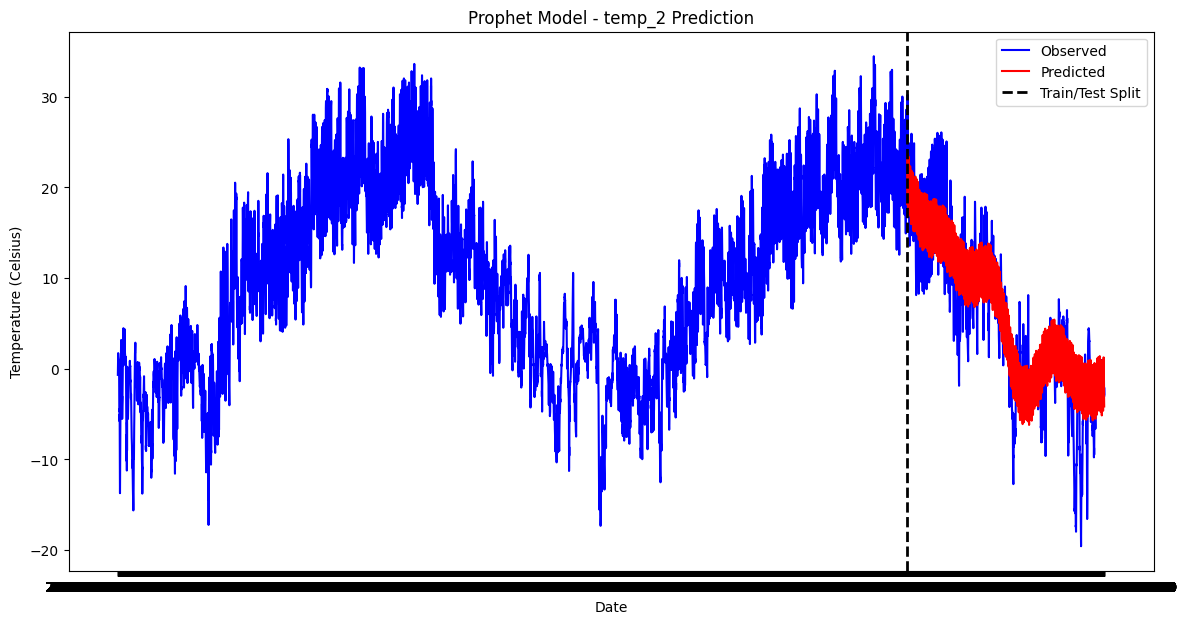

In [28]:
import matplotlib.pyplot as plt

# Choose a variable to visualize (e.g., temperature_2m)
variable_to_visualize = 'temp_2'

# Extract the trained model for the selected variable
selected_model = models['kyiv']['temp_2']

# Extract the testing set for the selected variable
column_name = f'y_{variable_to_visualize}'
df_temp = df[['ds', column_name]].rename(columns={column_name: 'y'})
for i in range(1, 6):
    df_temp[f'y_{variable_to_visualize}_lag_{i}'] = df_temp['y'].shift(i)
df_temp = df_temp.dropna()
train_size = int(len(df_temp) * 0.8)
test = df_temp.iloc[train_size:]

# Make predictions on the entire dataset (train + test)
forecast = selected_model.predict(df_temp.drop('y', axis=1))

# Plotting
plt.figure(figsize=(14, 7))

# Plotting the observed values
plt.plot(df_temp['ds'], df_temp['y'], label='Observed', color='blue')

# Plotting the predicted values on the test set
plt.plot(test['ds'], forecast['yhat'][train_size:], label='Predicted', color='red')

# Highlighting the training/test split
plt.axvline(test['ds'].iloc[0], color='black', linestyle='--', linewidth=2, label='Train/Test Split')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')  # Change the label based on the selected variable
plt.title(f'Prophet Model - {variable_to_visualize} Prediction')

# Adding legend
plt.legend()

# Show the plot
plt.show()


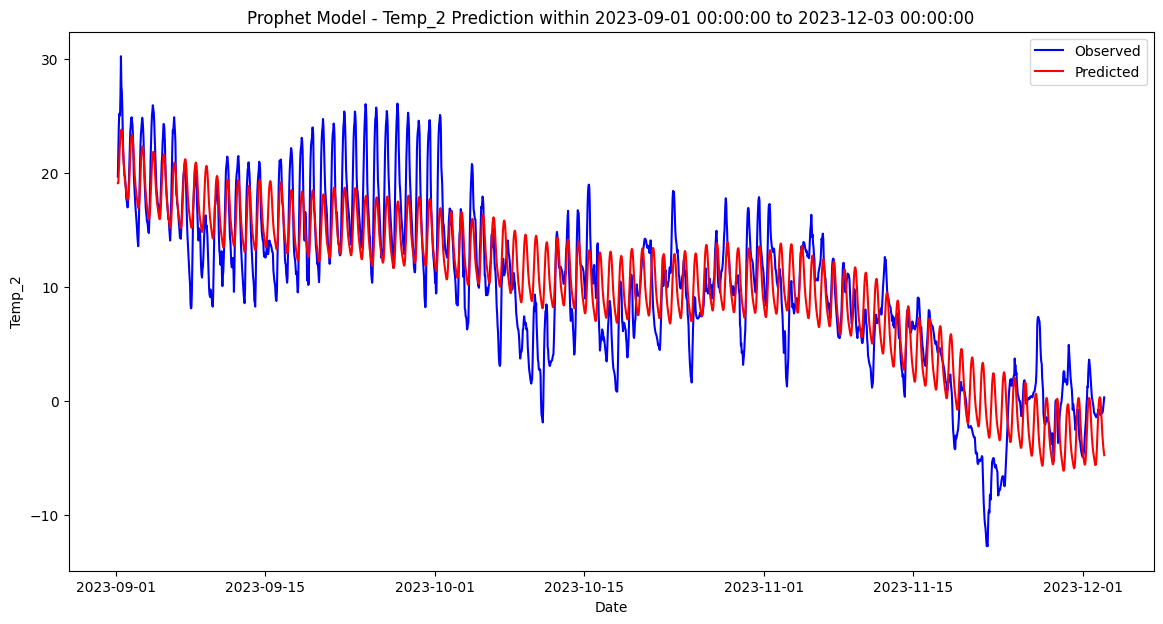

In [29]:
import pandas as pd
import matplotlib.pyplot as plt


def plot_actual_vs_predicted(start_date, periods, variable='temp_2'):
    # Convert start_date to Timestamp
    start_date = pd.to_datetime(start_date)

    # Calculate end_date based on start_date and periods
    end_date = start_date + pd.DateOffset(hours=periods)

    # Filter data within the specified interval
    df_interval = df[(df['ds'] >= start_date) & (df['ds'] < end_date)]

    # Extract the trained model for the selected variable
    selected_model = models['kyiv']['temp_2']


    # Prepare data for the selected interval
    column_name = f'y_{variable}'
    df_temp = df_interval[['ds', column_name]].rename(columns={column_name: 'y'})
    for i in range(1, 6):
        df_temp[f'y_{variable}_lag_{i}'] = df_temp['y'].shift(i)
    df_temp = df_temp.dropna()
    train_size = int(len(df_temp) * 0.8)
    test = df_temp.iloc[train_size:]

    # Make predictions on the entire dataset (train + test)
    forecast = selected_model.predict(pd.concat([df_temp.drop('y', axis=1).iloc[0:1], df_temp.drop('y', axis=1)]))

    # Plotting
    plt.figure(figsize=(14, 7))

    # Plotting the observed values
    plt.plot(df_temp['ds'], df_temp['y'], label='Observed', color='blue')

    # Plotting the predicted values on the entire dataset
    plt.plot(df_temp['ds'], forecast['yhat'][:len(df_temp)], label='Predicted', color='red')

    # Adding labels and title
    plt.xlabel('Date')
    plt.ylabel(f'{variable.capitalize()}')  # Change the label based on the selected variable
    plt.title(f'Prophet Model - {variable.capitalize()} Prediction within {start_date} to {end_date}')

    # Adding legend
    plt.legend()

    # Show the plot
    plt.show()


df['ds'] = pd.to_datetime(df['ds'])

start_date = '2023-09-01 00:00:00'
periods = 24 * 31 * 3
plot_actual_vs_predicted(start_date, periods, variable='temp_2')
